# Loading the Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
%matplotlib inline

# Processing and Cleaning

In [2]:
df=pd.read_csv('owid-covid-data.csv')
df.head()

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,...,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
0,AFG,Asia,Afghanistan,2019-12-31,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
1,AFG,Asia,Afghanistan,2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
2,AFG,Asia,Afghanistan,2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
3,AFG,Asia,Afghanistan,2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
4,AFG,Asia,Afghanistan,2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83


In [3]:
df.dtypes

iso_code                            object
continent                           object
location                            object
date                                object
total_cases                        float64
new_cases                          float64
total_deaths                       float64
new_deaths                         float64
total_cases_per_million            float64
new_cases_per_million              float64
total_deaths_per_million           float64
new_deaths_per_million             float64
total_tests                        float64
new_tests                          float64
total_tests_per_thousand           float64
new_tests_per_thousand             float64
new_tests_smoothed                 float64
new_tests_smoothed_per_thousand    float64
tests_units                         object
stringency_index                   float64
population                         float64
population_density                 float64
median_age                         float64
aged_65_old

In [4]:
df.shape

(29801, 34)

In [5]:
df.isnull().sum()

iso_code                              64
continent                            259
location                               0
date                                   0
total_cases                          311
new_cases                            311
total_deaths                         311
new_deaths                           311
total_cases_per_million              375
new_cases_per_million                375
total_deaths_per_million             375
new_deaths_per_million               375
total_tests                        20681
new_tests                          21079
total_tests_per_thousand           20681
new_tests_per_thousand             21079
new_tests_smoothed                 19902
new_tests_smoothed_per_thousand    19902
tests_units                        19207
stringency_index                    5854
population                            64
population_density                  1319
median_age                          2935
aged_65_older                       3319
aged_70_older   

In [6]:
df.drop(['total_tests','new_tests','total_tests_per_thousand','new_tests_per_thousand','new_tests_smoothed',
         'new_tests_smoothed_per_thousand','tests_units','extreme_poverty','handwashing_facilities'],axis=1,inplace=True)

In [7]:
df[pd.isnull(df['iso_code'])]['location'].value_counts()

International    64
Name: location, dtype: int64

In [8]:
df=df[~(df['location']=='International')]

In [9]:
df.fillna(0,inplace=True)

In [10]:
df['date']=[dt.datetime.strptime(x,'%Y-%m-%d') for x in df['date']]

In [11]:
df=df[~(df['new_deaths']<0)]
df=df[~(df['new_cases']<0)]
df=df[~(df['total_cases']<0)]
df=df[~(df['total_deaths']<0)]

# EDA

### Filtering out most affected countries

In [12]:
countries=['United States','Italy','Spain','India','South Korea','Brazil','France','China']
cvd=df[df.location.isin(countries)]
cvd.set_index('date',inplace=True)
cvd.head()

,iso_code,continent,location,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,...,median_age,aged_65_older,aged_70_older,gdp_per_capita,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy
date,,,,,,,,,,,,,,,,,,,,,
2019-12-31,BRA,South America,Brazil,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,33.5,8.552,5.06,14103.452,177.961,8.11,10.1,17.9,2.2,75.88
2020-01-01,BRA,South America,Brazil,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,33.5,8.552,5.06,14103.452,177.961,8.11,10.1,17.9,2.2,75.88
2020-01-02,BRA,South America,Brazil,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,33.5,8.552,5.06,14103.452,177.961,8.11,10.1,17.9,2.2,75.88
2020-01-03,BRA,South America,Brazil,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,33.5,8.552,5.06,14103.452,177.961,8.11,10.1,17.9,2.2,75.88
2020-01-04,BRA,South America,Brazil,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,33.5,8.552,5.06,14103.452,177.961,8.11,10.1,17.9,2.2,75.88


### Calculating the mortalit rate - Deaths according to cases

In [13]:
cvd['mortality_rate']=cvd['total_deaths']/cvd['total_cases']
cvd['mortality_rate'].tail()

C:\Users\bansa\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


date
2020-07-08    0.043884
2020-07-09    0.043309
2020-07-10    0.042749
2020-07-11    0.042108
2020-07-12    0.041511
Name: mortality_rate, dtype: float64

### Showing the change in new cases, total cases and deaths in most affected countries 

Text(0.5,1,'Total Deaths')

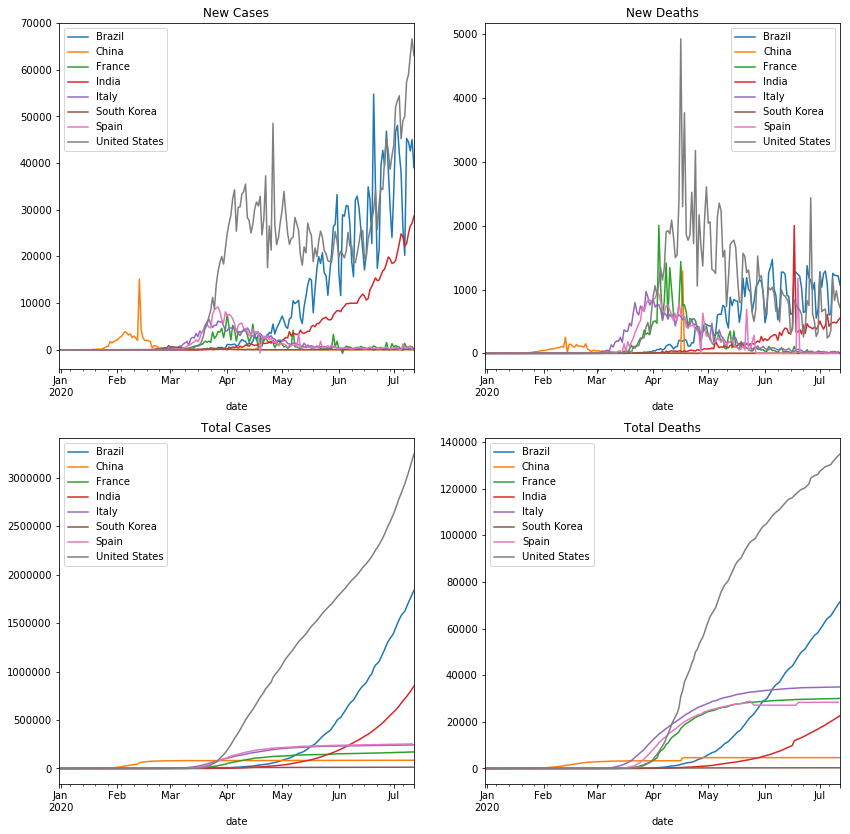

In [14]:
fig,axes=plt.subplots(nrows=2,ncols=2,figsize=(14,14))

cvd.groupby('location')['new_cases'].plot(ax=axes[0,0],legend=True)
cvd.groupby('location')['new_deaths'].plot(ax=axes[0,1],legend=True)
cvd.groupby('location')['total_cases'].plot(ax=axes[1,0],legend=True)
cvd.groupby('location')['total_deaths'].plot(ax=axes[1,1],legend=True)

axes[0,0].set_title('New Cases')
axes[0,1].set_title('New Deaths')
axes[1,0].set_title('Total Cases')
axes[1,1].set_title('Total Deaths')

### Showing the change in new cases, total cases and deaths in whole world

Text(0.5,1,'Total Deaths')

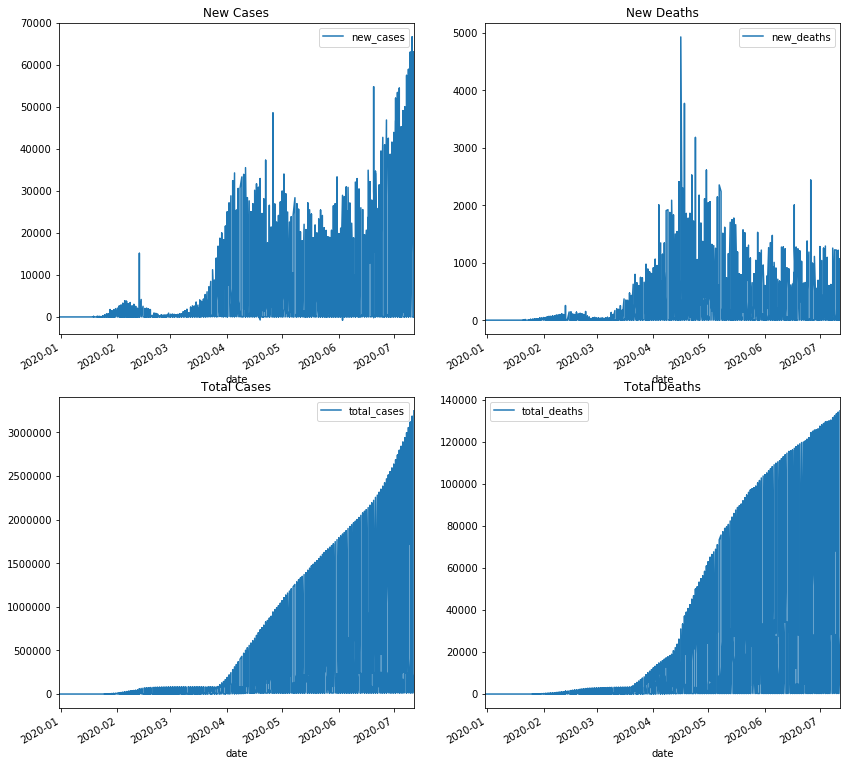

In [15]:
fig,axes=plt.subplots(nrows=2,ncols=2,figsize=(14,14))
cvd['new_cases'].plot(ax=axes[0,0],legend=True)
cvd['new_deaths'].plot(ax=axes[0,1],legend=True)
cvd['total_cases'].plot(ax=axes[1,0],legend=True)
cvd['total_deaths'].plot(ax=axes[1,1],legend=True)

axes[0,0].set_title('New Cases')
axes[0,1].set_title('New Deaths')
axes[1,0].set_title('Total Cases')
axes[1,1].set_title('Total Deaths')

In [16]:
cvd['mortality_rate'].fillna(0,inplace=True)

C:\Users\bansa\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


### Changes in mortality rate of most affected countries

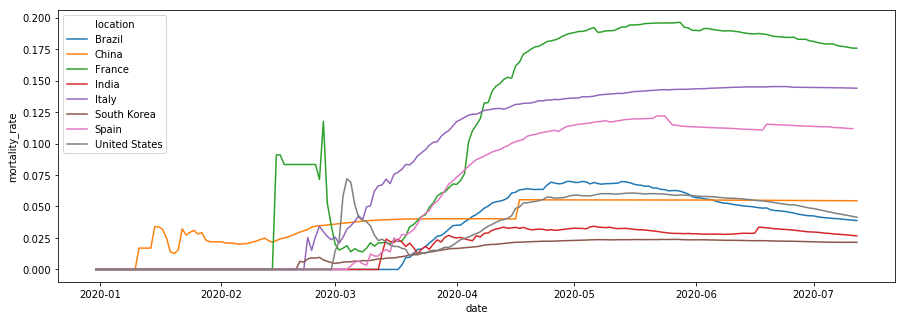

In [17]:
plt.figure(figsize=(15,5))
sns.lineplot(cvd.index,cvd['mortality_rate'],hue=cvd['location'])

### Total Cases per million 

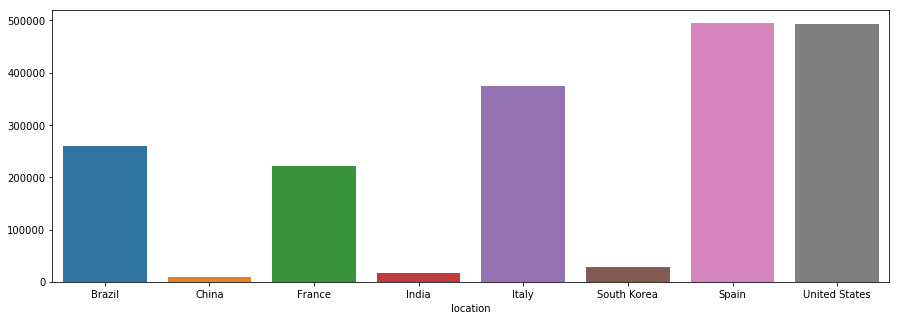

In [19]:
plt.figure(figsize=(15,5))
x=cvd.groupby('location')['total_cases_per_million'].sum()
sns.barplot(x.index,x.values)

### Total Deaths per million 

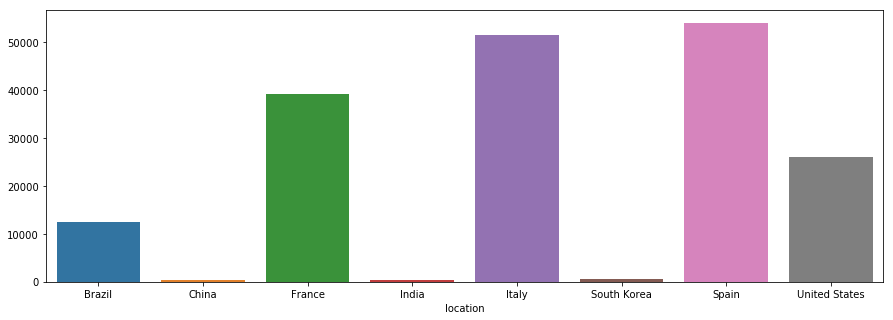

In [20]:
plt.figure(figsize=(15,5))
x=cvd.groupby('location')['total_deaths_per_million'].sum()
sns.barplot(x.index,x.values)

### Total cases with respect to population of that country

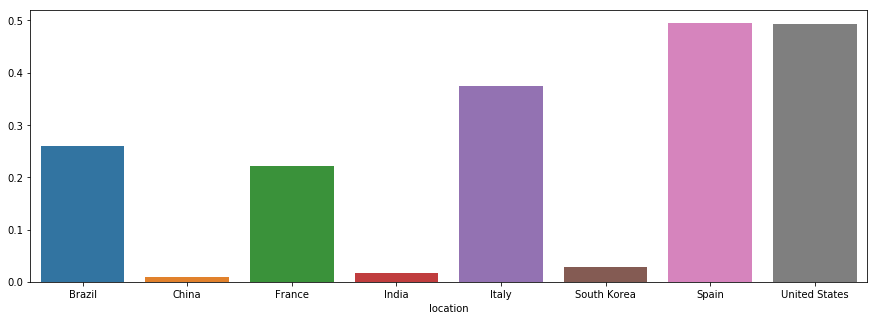

In [23]:
cvd['Cases By Population']=cvd['total_cases']/cvd['population']
plt.figure(figsize=(15,5))
x=cvd.groupby('location')['Cases By Population'].sum()
sns.barplot(x.index,x.values)

### Stringency Index Value Distribution

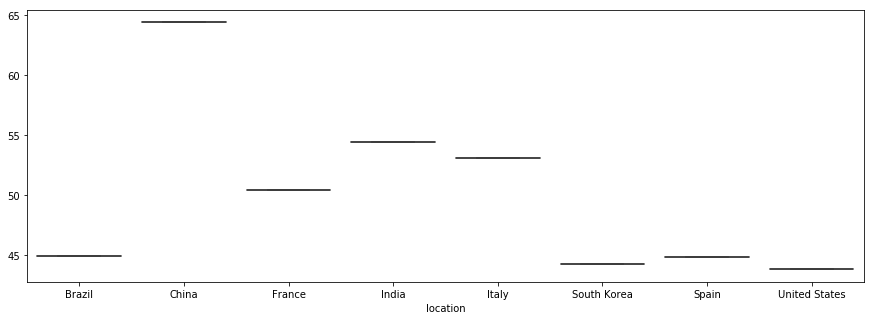

In [25]:
plt.figure(figsize=(15,5))
x=cvd.groupby('location')['stringency_index'].mean()
sns.boxplot(x.index,x.values)

### Relation of Stringency Index value to increase in cases

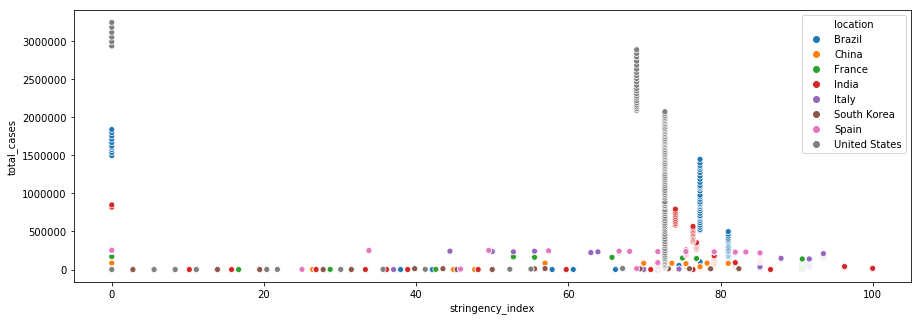

In [26]:
plt.figure(figsize=(15,5))
sns.scatterplot(x=cvd['stringency_index'],y=cvd['total_cases'],hue=cvd['location'])

###  Amount of 65 years older people affected by COVID-19

C:\Users\bansa\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


location
Brazil           AxesSubplot(0.125,0.125;0.775x0.755)
China            AxesSubplot(0.125,0.125;0.775x0.755)
France           AxesSubplot(0.125,0.125;0.775x0.755)
India            AxesSubplot(0.125,0.125;0.775x0.755)
Italy            AxesSubplot(0.125,0.125;0.775x0.755)
South Korea      AxesSubplot(0.125,0.125;0.775x0.755)
Spain            AxesSubplot(0.125,0.125;0.775x0.755)
United States    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Covid_Cases_65_older, dtype: object

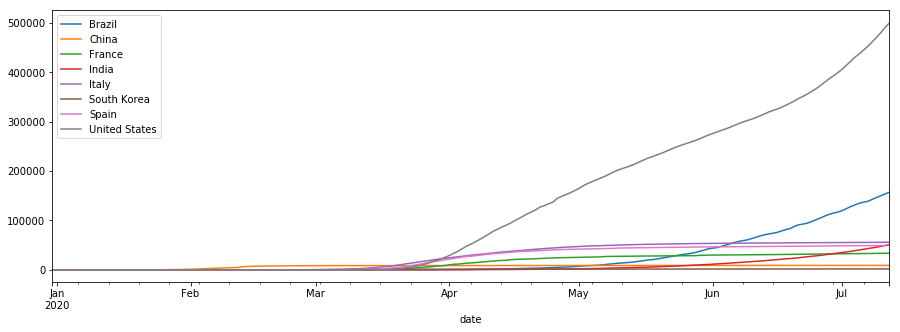

In [27]:
cvd['Covid_Cases_65_older']=(cvd['aged_65_older']/100)*cvd['total_cases']
plt.figure(figsize=(15,5))
cvd.groupby('location')['Covid_Cases_65_older'].plot(legend=True)

### Amount of 70 years older people affected by COVID-19

C:\Users\bansa\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


location
Brazil           AxesSubplot(0.125,0.125;0.775x0.755)
China            AxesSubplot(0.125,0.125;0.775x0.755)
France           AxesSubplot(0.125,0.125;0.775x0.755)
India            AxesSubplot(0.125,0.125;0.775x0.755)
Italy            AxesSubplot(0.125,0.125;0.775x0.755)
South Korea      AxesSubplot(0.125,0.125;0.775x0.755)
Spain            AxesSubplot(0.125,0.125;0.775x0.755)
United States    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Covid_Cases_70_older, dtype: object

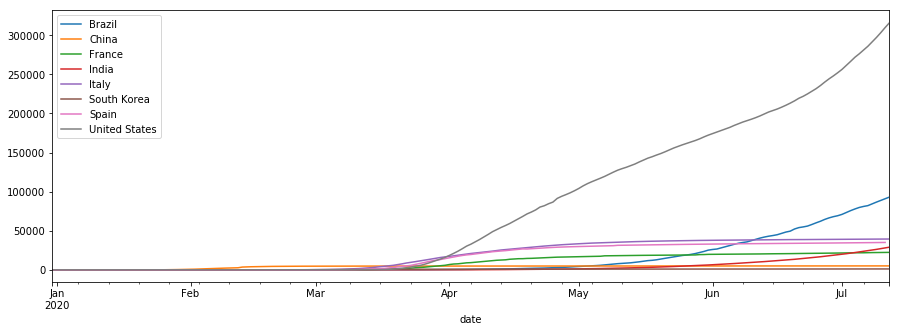

In [28]:
cvd['Covid_Cases_70_older']=(cvd['aged_70_older']/100)*cvd['total_cases']
plt.figure(figsize=(15,5))
cvd.groupby('location')['Covid_Cases_70_older'].plot(legend=True)

### Total Cases of Smokers

C:\Users\bansa\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\bansa\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Text(0.5,1,'Female Smoker Cases')

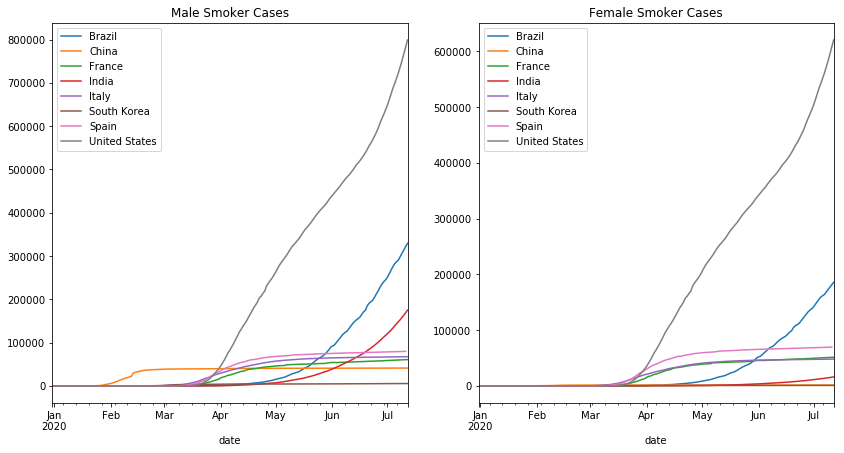

In [29]:
cvd['Cases_Male_Smoker']=(cvd['male_smokers']/100)*cvd['total_cases']
cvd['Cases_Female_Smoker']=(cvd['female_smokers']/100)*cvd['total_cases']

fig,(ax1, ax2) = plt.subplots(nrows=1, ncols=2,figsize=(14,7))

cvd.groupby('location')['Cases_Male_Smoker'].plot(ax=ax1,legend=True)
cvd.groupby('location')['Cases_Female_Smoker'].plot(ax=ax2,legend=True)

ax1.set_title('Male Smoker Cases')
ax2.set_title('Female Smoker Cases')

### Total Cases by continent 

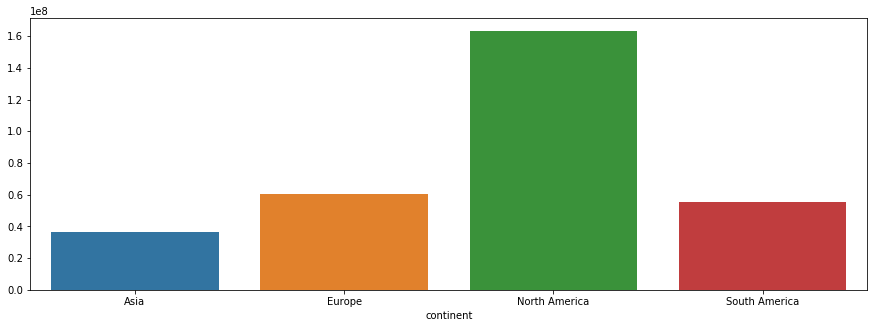

In [36]:
plt.figure(figsize=(15,5))
x=cvd.groupby('continent')['total_cases'].sum()
sns.barplot(x.index,x.values)

### Total Deaths by continent

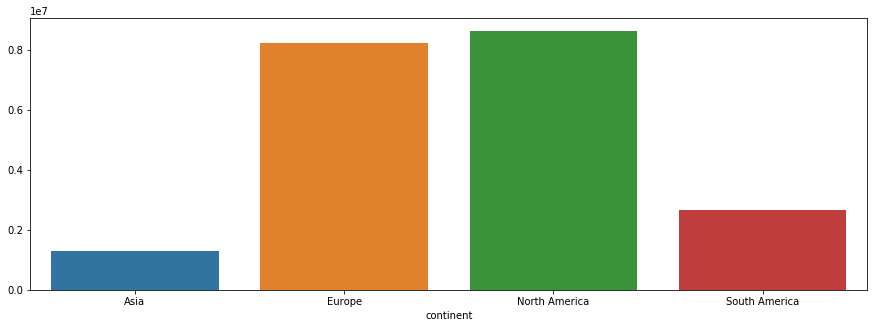

In [37]:
plt.figure(figsize=(15,5))
x=cvd.groupby('continent')['total_deaths'].sum()
sns.barplot(x.index,x.values)